In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# data = pd.read_csv("https://drive.google.com/file/d/1rOgkTLvI0k8OKK-RrHue1jB0A7H2O5J3/view?usp=sharing")
data = pd.read_csv("/content/drive/MyDrive/IS460/credit_train.csv")
# data = pd.read_csv("/content/drive/My Drive/Uni/IS460/credit_train.csv") #To comment this line out depending on your path

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. Data cleaning

## 1.1 Data overview

In [6]:
data.head(20)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714.0,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,Fully Paid,215952.0,Short Term,739.0,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20.0,0.0,669560.0,1021460.0,0.0,0.0


In [7]:
data.tail(20)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [10]:
data['Loan ID'].is_unique

False

In [11]:
data["Loan ID"].value_counts()

14dd8831-6af5-400b-83ec-68e61888a048    2
1373bfdf-ae6d-4fa5-b3e9-73ba60b7868e    2
111602d9-f958-403d-a9d5-4fba630297eb    2
1076b681-b8ff-463f-a7af-576e12edd637    2
f7817002-4e22-4462-8abc-402eb4ceaa6c    2
                                       ..
6c4cac03-f896-4e4c-8503-6c91d83b145b    1
73e806fa-000a-4d7a-ab65-de1b62339427    1
b14a15a8-4d95-4473-9288-77a2b4b486d5    1
c6101fbe-52f3-41b7-b6a1-b062b5f3ad70    1
c63916c6-6d46-47a9-949a-51d09af4414f    1
Name: Loan ID, Length: 81999, dtype: int64

In [12]:
data[data["Loan ID"].duplicated()]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
420,a1301a8a-e66e-4747-beb7-c2f243f2c689,ab46b1a7-f937-4ba9-ac98-270344120cf7,Fully Paid,152372.0,Short Term,697.0,845937.0,< 1 year,Rent,Debt Consolidation,2876.22,8.8,46.0,10.0,0.0,56943.0,215468.0,0.0,0.0
967,32200a7e-c65e-4e5e-9878-1161d256bcfe,64dcd3aa-3c82-4c70-929a-a83d249d894a,Fully Paid,99999999.0,Long Term,689.0,866799.0,9 years,Home Mortgage,Debt Consolidation,3676.69,14.1,7.0,4.0,2.0,86051.0,167750.0,2.0,0.0
1003,c5a1a3e9-da4a-4c9e-8d29-2907c613b82f,a239a831-642f-4cf8-926c-beac6ee5f36d,Fully Paid,448712.0,Long Term,696.0,1264602.0,NaN,Home Mortgage,Debt Consolidation,33722.91,16.7,22.0,28.0,2.0,328054.0,895906.0,0.0,2.0
1627,4c1d5195-f43a-44af-8322-f831800ce490,e849b404-a91e-4ffe-92f1-2a06e99d65a6,Fully Paid,751300.0,Short Term,716.0,3614978.0,6 years,Home Mortgage,Debt Consolidation,72600.71,11.9,69.0,29.0,0.0,957752.0,2128522.0,0.0,0.0
1828,191a92bd-67d1-4998-b680-08489937390d,0e0fa488-b6cb-444e-b3cf-c2021a74cad8,Fully Paid,341352.0,Long Term,712.0,751108.0,< 1 year,Home Mortgage,Debt Consolidation,10327.83,13.3,NaN,11.0,0.0,81377.0,110858.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data.drop_duplicates(subset=['Loan ID'])

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0
99999,c63916c6-6d46-47a9-949a-51d09af4414f,1b3014be-5c07-4d41-abe7-44573c375886,Fully Paid,99999999.0,Short Term,743.0,935180.0,NaN,Own Home,Debt Consolidation,9118.10,13.0,NaN,4.0,1.0,45600.0,91014.0,1.0,0.0


In [14]:
# Drop unnecessary columns
data.drop(['Customer ID', 'Loan ID'], axis=1, inplace=True)
data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


## 1.2 Null values

In [15]:
data.isnull().sum()

Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [16]:
# Remove 'Months since last delinquent', 50% NaN 
data.drop('Months since last delinquent', axis=1, inplace=True)
data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [17]:
# Drop NaN rows 
data = data[data['Loan Status'].notna()]
data.isna().sum()

Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 19154
Annual Income                19154
Years in current job          4222
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              2
Bankruptcies                   204
Tax Liens                       10
dtype: int64

In [18]:
#Drop NA since only 204 and 10 values
data.dropna(subset = ["Bankruptcies","Tax Liens","Maximum Open Credit"],axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [19]:
#Fill mode for years in current job
data['Years in current job']=data['Years in current job'].fillna(data['Years in current job'].mode()[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 1.3 Categorical


### 1.3.1 Unique values

Check for overlapping categories, convert categories to numbers.

In [20]:
data['Loan Status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [21]:
data['Term'].unique()

array(['Short Term', 'Long Term'], dtype=object)

In [22]:
data['Years in current job'].unique()

array(['8 years', '10+ years', '3 years', '5 years', '< 1 year',
       '2 years', '4 years', '9 years', '7 years', '1 year', '6 years'],
      dtype=object)

In [23]:
data['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [24]:
# Assuming that 'Home Mortgage' and 'HaveMortgage' are equal 
data['Home Ownership'].replace('HaveMortgage', 'Home Mortgage', inplace=True)
data['Home Ownership'].unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


array(['Home Mortgage', 'Own Home', 'Rent'], dtype=object)

In [25]:
data['Purpose'].unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'other',
       'Business Loan', 'Buy a Car', 'major_purchase', 'Take a Trip',
       'Other', 'small_business', 'Medical Bills', 'wedding', 'vacation',
       'Educational Expenses', 'moving', 'renewable_energy'], dtype=object)

In [26]:
# Remove duplicate Other row
data['Purpose'].replace('other', 'Other', inplace=True)
data['Purpose'].unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'Other',
       'Business Loan', 'Buy a Car', 'major_purchase', 'Take a Trip',
       'small_business', 'Medical Bills', 'wedding', 'vacation',
       'Educational Expenses', 'moving', 'renewable_energy'], dtype=object)

In [27]:
# Compare if frequency of loan type is the same 
# for both Business Loan and small_business. 
# If so, combine categories to 'Business Loan'
data.groupby("Purpose")["Loan Status"].count()

Purpose
Business Loan            1555
Buy House                 678
Buy a Car                1260
Debt Consolidation      78430
Educational Expenses       93
Home Improvements        5828
Medical Bills            1124
Other                    9252
Take a Trip               572
major_purchase            352
moving                    150
renewable_energy           10
small_business            277
vacation                  101
wedding                   112
Name: Loan Status, dtype: int64

In [28]:
# Compare if frequency of loan type is the same 
# for both Take a Trip and vacation. 
# If so, combine categories to 'Take a Trip

#This one makes sense
data['Purpose'].replace({'vacation':"Trip",'Take a Trip':"Trip"}, inplace=True)

In [29]:
data[data['Purpose']=='renewable_energy'].count()

Loan Status                  10
Current Loan Amount          10
Term                         10
Credit Score                  8
Annual Income                 8
Years in current job         10
Home Ownership               10
Purpose                      10
Monthly Debt                 10
Years of Credit History      10
Number of Open Accounts      10
Number of Credit Problems    10
Current Credit Balance       10
Maximum Open Credit          10
Bankruptcies                 10
Tax Liens                    10
dtype: int64

### 1.3.2 Frequency

In [30]:
data['Loan Status'].value_counts()

Fully Paid     77207
Charged Off    22587
Name: Loan Status, dtype: int64

In [31]:
data['Term'].value_counts()

Short Term    72002
Long Term     27792
Name: Term, dtype: int64

In [32]:
data['Years in current job'].value_counts()

10+ years    35312
2 years       9104
3 years       8151
< 1 year      8114
5 years       6778
1 year        6436
4 years       6132
6 years       5676
7 years       5573
8 years       4569
9 years       3949
Name: Years in current job, dtype: int64

In [33]:
data['Home Ownership'].value_counts()

Home Mortgage    48547
Rent             42085
Own Home          9162
Name: Home Ownership, dtype: int64

In [34]:
data['Purpose'].value_counts()

Debt Consolidation      78430
Other                    9252
Home Improvements        5828
Business Loan            1555
Buy a Car                1260
Medical Bills            1124
Buy House                 678
Trip                      673
major_purchase            352
small_business            277
moving                    150
wedding                   112
Educational Expenses       93
renewable_energy           10
Name: Purpose, dtype: int64

## 1.4 Numerical


### 1.4.1 Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


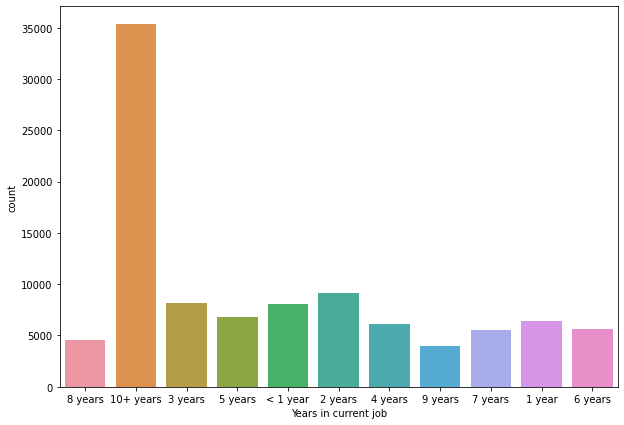

In [35]:
plt.figure(figsize = (10,7))
sns.countplot(data['Years in current job'])

In [36]:
def currentjobtofloat(row):
    year = row["Years in current job"]
    for i in year.split(" "):
        if i.isdigit():
            return i
        elif i == "10+":
            return 10
        elif i =="<1":
          return 0
data["years at job"] = data.apply(lambda row:currentjobtofloat(row),axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


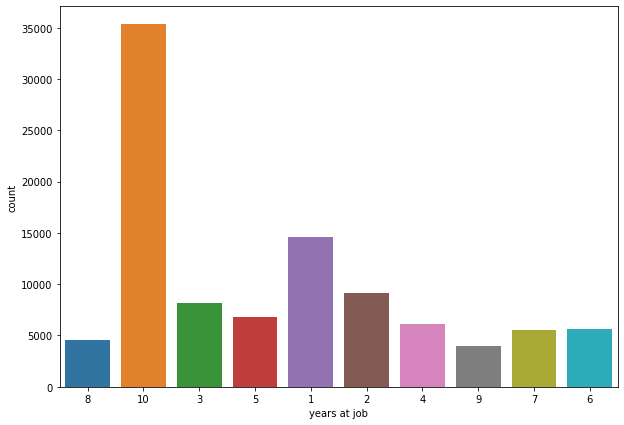

In [37]:
plt.figure(figsize = (10,7))
sns.countplot(data['years at job'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


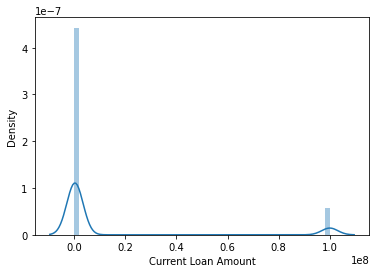

In [38]:
sns.distplot(data["Current Loan Amount"])

In [39]:
#Remove outliers from Current Loan Amount
data = data[data['Current Loan Amount']<1000000]

In [40]:
data.isna().sum()

Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 19111
Annual Income                19111
Years in current job             0
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              0
Bankruptcies                     0
Tax Liens                        0
years at job                     0
dtype: int64

In [41]:
data["Credit Score"].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0         709.0
1           NaN
3         721.0
4           NaN
5        7290.0
          ...  
99993     717.0
99994     719.0
99995     725.0
99997     742.0
99998     746.0
Name: Credit Score, Length: 88337, dtype: float64>

In [42]:
#Fill Credit Score and Annual Income with Median
data["Credit Score"].fillna(data["Credit Score"].median(),inplace=True)
data["Annual Income"].fillna(data["Annual Income"].median(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [43]:
data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,years at job
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,8
1,Fully Paid,262328.0,Short Term,722.0,1167816.0,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,10
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,3
4,Fully Paid,176220.0,Short Term,722.0,1167816.0,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,5
5,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0,10


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


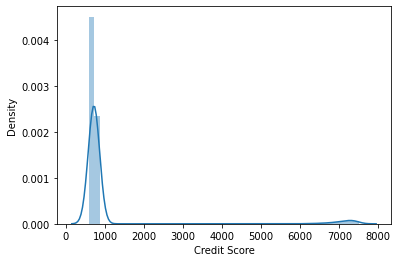

In [44]:
# A credit score is a three-digit number, typically between 300 and 850, 
# designed to represent your credit risk, or the likelihood you will pay your bills on time.
sns.distplot(data["Credit Score"])

In [45]:
def fixcreditscore(row):
    credit = row["Credit Score"]
    if credit > 850 :
        credit = credit/10  #data error, has 1 more 0 in the data
    return credit
data["Credit Score"] = data.apply(lambda row:fixcreditscore(row),axis=1)

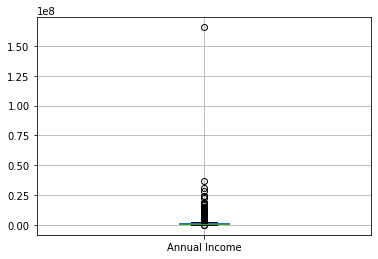

In [46]:
data.boxplot('Annual Income')

In [47]:
data[data['Current Loan Amount']>10000000]['Loan Status'].count()

0

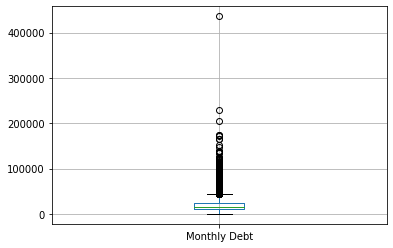

In [48]:
 data.boxplot('Monthly Debt')

### Visualisation

In [49]:
data.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'years at job'],
      dtype='object')

### Loan Status breakdown

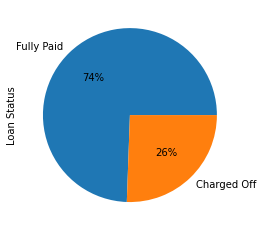

In [50]:
data["Loan Status"].value_counts().plot(kind='pie',autopct='%.0f%%')

In [51]:
Ratio = data['Loan Status'].value_counts()[0] / data['Loan Status'].value_counts()[1]
Ratio
#Class inbalance

2.9109664851463233

## Home ownership breakdown

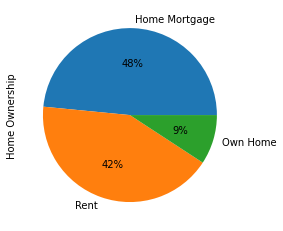

In [52]:
data["Home Ownership"].value_counts().plot(kind='pie',autopct='%.0f%%')

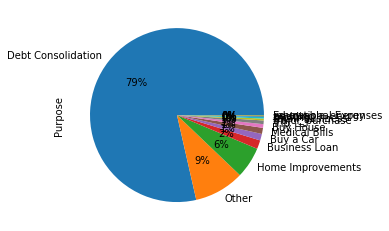

In [53]:
data["Purpose"].value_counts().plot(kind='pie',autopct='%.0f%%')

Text(0.5, 1.0, 'Purpose of taking Loan')

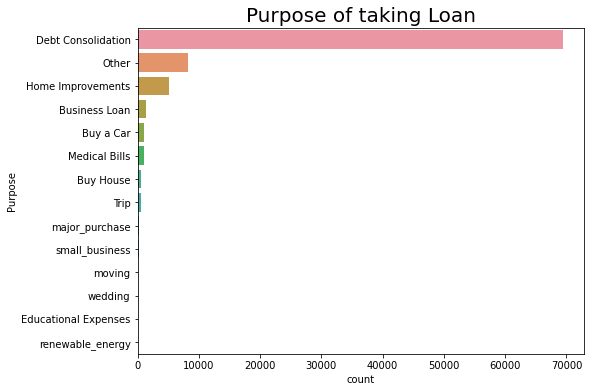

In [54]:
plt.figure(figsize=(8,6))
sns.countplot(y='Purpose' , data=data, order = data['Purpose'].value_counts().index)
plt.title('Purpose of taking Loan' , fontdict={'fontsize':20})

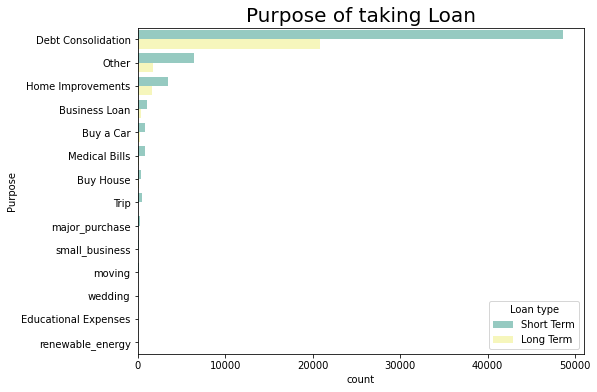

In [55]:
plt.figure(figsize=(8,6))
sns.countplot(y='Purpose' , data=data, order = data['Purpose'].value_counts().index,
              hue='Term', palette = 'Set3')
plt.title('Purpose of taking Loan' , fontdict={'fontsize':20})
plt.legend(title="Loan type", loc="lower right");

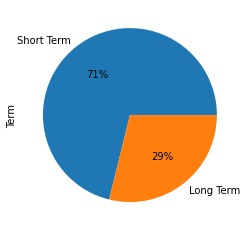

In [56]:
data["Term"].value_counts().plot(kind='pie',autopct='%.0f%%')

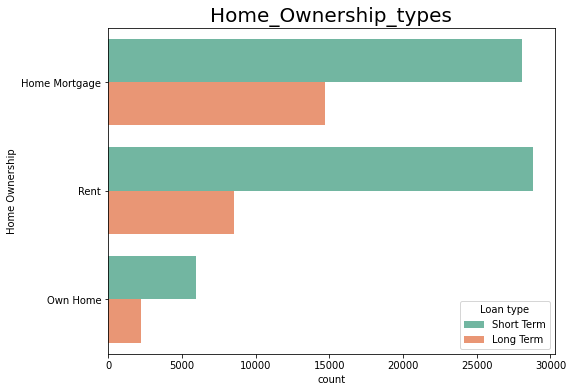

In [57]:
plt.figure(figsize=(8,6))
sns.countplot(y='Home Ownership' , data=data, order = data['Home Ownership'].value_counts().index,
              hue='Term', palette = 'Set2')
plt.title('Home_Ownership_types' , fontdict={'fontsize':20})
plt.legend(title="Loan type", loc="lower right");

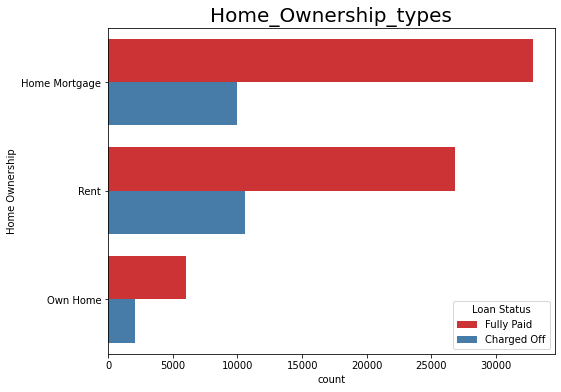

In [58]:
plt.figure(figsize=(8,6))
sns.countplot(y='Home Ownership' , data=data, order = data['Home Ownership'].value_counts().index,
              hue='Loan Status', palette = 'Set1')
plt.title('Home_Ownership_types' , fontdict={'fontsize':20})
plt.legend(title="Loan Status", loc="lower right");

# Numerical

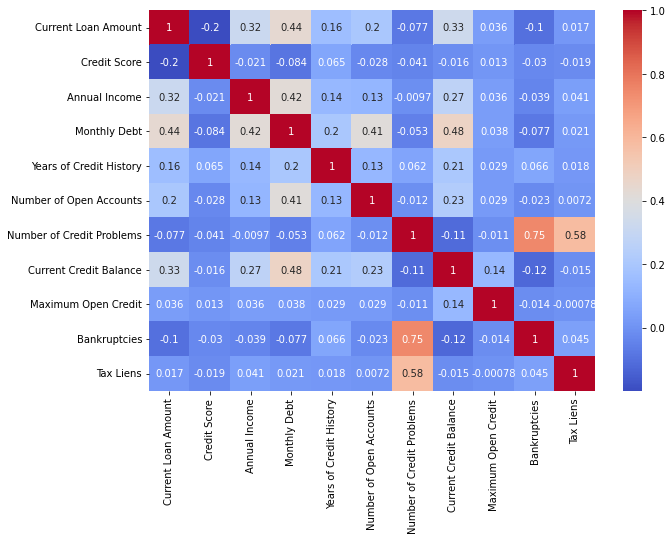

In [59]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot= True, cmap = "coolwarm")

In [60]:
#Num of credit problems and Tax Liens are correlated with Bankruptcies

[Text(0, 0, 'Current Loan Amount'),
 Text(0, 0, 'Credit Score'),
 Text(0, 0, 'Annual Income'),
 Text(0, 0, 'Monthly Debt'),
 Text(0, 0, 'Years of Credit History'),
 Text(0, 0, 'Number of Open Accounts'),
 Text(0, 0, 'Number of Credit Problems'),
 Text(0, 0, 'Current Credit Balance'),
 Text(0, 0, 'Maximum Open Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax Liens')]

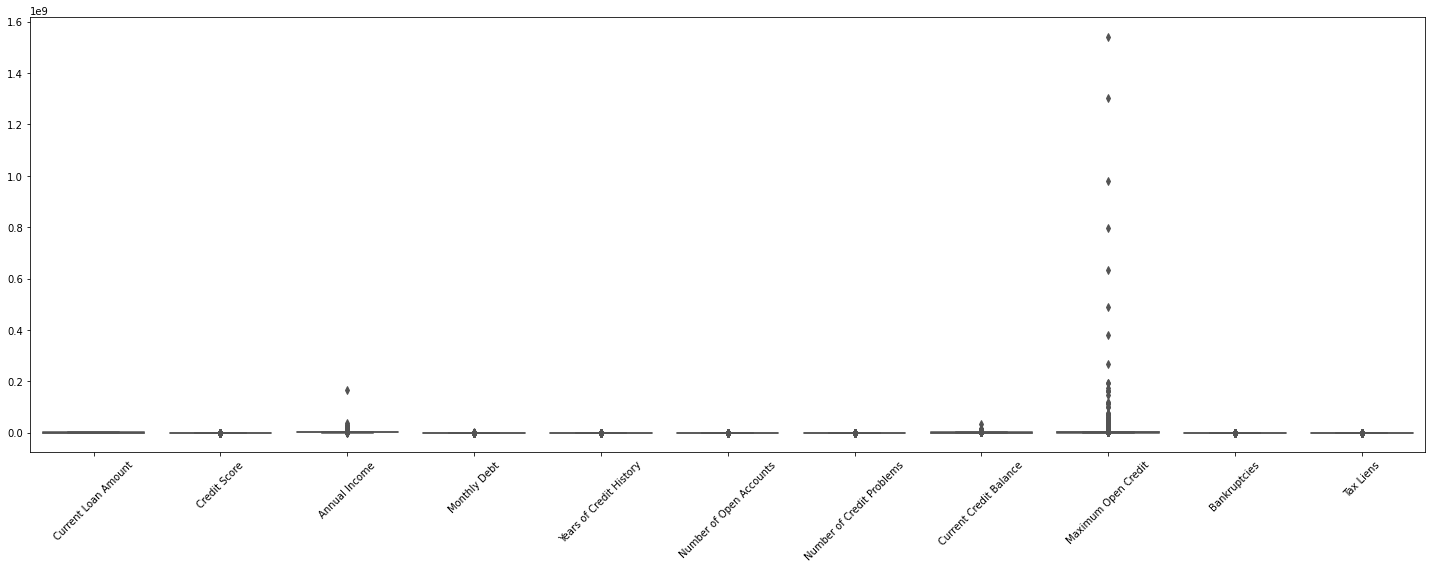

In [61]:
#outliers
plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=data)
u.set_xticklabels(u.get_xticklabels(),rotation=45)

In [62]:
#View num outliers 
def DEF_outliers(data , col):
    OUT=pd.DataFrame(columns=[ "< Q1" , "> Q3" ],index=[col])

    for col_ in col:
        count_under = 0
        count_upper = 0
        outlier=data[col_]
        Q1=outlier.quantile(0.25)
        Q3=outlier.quantile(0.75)
        IQR=Q3-Q1
        underoutliers=Q1-1.5*IQR
        upperoutliers=Q3+1.5*IQR
        under_border=(outlier<underoutliers)
        upper_border=(outlier>upperoutliers)

        #print(under_border.value_counts())
        #print(upper_border.value_counts())
        OUT.loc[col_,"< Q1"] = sum(under_border)
        OUT.loc[col_,"> Q3"] = sum(upper_border)

      
         
    return OUT

In [63]:
num_col=  ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt','Current Credit Balance','Maximum Open Credit']

In [64]:
DEF_outliers(data , num_col)

,< Q1,> Q3
Current Loan Amount,0,0
Credit Score,5954,0
Annual Income,2,6480
Monthly Debt,0,2950
Current Credit Balance,0,4578
Maximum Open Credit,0,5059


In [65]:
data

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,years at job
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,8
1,Fully Paid,262328.0,Short Term,722.0,1167816.0,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,10
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,3
4,Fully Paid,176220.0,Short Term,722.0,1167816.0,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,5
5,Charged Off,206602.0,Short Term,729.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,Fully Paid,44484.0,Short Term,717.0,1152426.0,10+ years,Home Mortgage,small_business,6280.64,21.0,6.0,0.0,961932.0,0.0,0.0,0.0,10
99994,Fully Paid,210584.0,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0,1
99995,Fully Paid,147070.0,Short Term,725.0,475437.0,7 years,Own Home,Other,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0,7
99997,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0,6


In [66]:
#Convert Categorical to numerical

from sklearn.preprocessing import LabelEncoder
df = data.copy()

LE = LabelEncoder()
df['Loan Status'] = LE.fit_transform(df['Loan Status']) # 1 is fully paid, 0 is Charged off
df['Term'] = LE.fit_transform(df['Term']) #Short term is 1, long term is 0
df['Purpose'] = LE.fit_transform(df['Purpose']) #order - 'Business Loan', 'Buy House', 'Buy a Car', 'Debt Consolidation', 'Educational Expenses', 'Home Improvements', 'Medical Bills','Other', 'Trip', 'major_purchase', 'moving', 'renewable_energy', 'small_business', 'wedding'
df["Home Ownership"] = LE.fit_transform(df['Home Ownership']) #['Home Mortgage', 'Own Home', 'Rent']

In [67]:
LE.classes_

array(['Home Mortgage', 'Own Home', 'Rent'], dtype=object)

In [68]:
df.drop(["Years in current job"],axis=1,inplace=True)

In [70]:
df.to_excel("/content/drive/MyDrive/IS460/credit_train_cleaned.xlsx")

Scaling Data


In [ ]:
data.columns

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
robScaler = RobustScaler()
scaled = robScaler.fit_transform(df.to_numpy())
scaled_df = pd.DataFrame(scaled, columns = df.columns)

In [ ]:
scaled_df

In [ ]:
y= df["Loan Status"]
X = df.drop(["Loan Status"],axis=1)

In [ ]:
y.unique()

In [ ]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split functions
from sklearn.model_selection import train_test_split

# Import accuracy_score
from sklearn.metrics import accuracy_score

In [ ]:
# Split dataset into 80% train, 20% test


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                          stratify = y,random_state = 1)

In [ ]:
dt = DecisionTreeClassifier(criterion="entropy",max_depth = 3)

In [ ]:
dt.fit(X_train, y_train)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
# Print the accuracy of labels predicted.
accuracy = accuracy_score(y_test, y_pred)
accuracy

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus 
from IPython.display import Image
from six import StringIO

feature_cols = X.columns

dot_data = StringIO()
export_graphviz(dt, out_file = dot_data, 
                      feature_names = feature_cols,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('DtreeLoan.png') 
Image(graph.create_png())

In [ ]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred, labels = ["0","1"])
print(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report

class_labels = ["Charged off","Fully paid"]
print(classification_report(y_test, y_pred, target_names=class_labels))

In [ ]:
#print the feature importance using the feature_importances_ attribute from the dt model
vi = dt.feature_importances_

print(vi)

In [ ]:
#Format the feature importance output here
n = len(feature_cols)
for i in range(0,n):
    print(feature_cols[i] + '   :',vi[i].round(3))

In [ ]:
# Create a pandas series(single columns data structure) with features importances for plotting.
#This makes it easy to visulaise when we have many features in the data

feat_importances = pd.Series(vi, index = feature_cols)

# Sort
sorted_feat_importances = feat_importances.sort_values()

# Make a horizontal bar plot
sorted_feat_importances.plot(kind='barh', color='blue')

In [ ]:
#Logistic Regression
from sklearn.linear_model import LinearRegression, LogisticRegression

log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
log_reg.fit(X, y)
y_pred = log_reg.predict(X_test)
accuracy_score(y_pred, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

param_grid={'penalty':['l1','l2'], 'C':[1e-3, 1e-2, 1e-1, 1, 10]}

model = GridSearchCV(estimator=LogisticRegression(solver="liblinear"), param_grid=param_grid)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)